In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('chess_games.csv')

In [3]:
df.head()

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3
3,kWKvrqYL,True,1.504110e+12,1.504110e+12,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3
4,9tXo1AUZ,True,1.504030e+12,1.504030e+12,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5


questions i have:
who wins more white or black (bar or pie)
the percentage of winning by winning style (horizontal stacked bar chart)


In [4]:
df.isna().sum()

id                0
rated             0
created_at        0
last_move_at      0
turns             0
victory_status    0
winner            0
increment_code    0
white_id          0
white_rating      0
black_id          0
black_rating      0
moves             0
opening_eco       0
opening_name      0
opening_ply       0
dtype: int64

In [5]:
df.duplicated().sum()

429

In [6]:
df.drop_duplicates(inplace=True)

In [7]:
df['average_rating'] = (df['white_rating'] + df['black_rating'])/2
df['elo_difference'] = abs(df['white_rating'] - df['black_rating'])

In [8]:
df['average_rating'].min(), df['average_rating'].max()

(816.5, 2475.5)

In [9]:
def categorize_elo(rating):
    if rating < 900:
        return '800-900'
    elif rating < 1000:
        return '900-1000'
    elif rating < 1100:
        return '1000-1100'
    elif rating < 1200:
        return '1100-1200'
    elif rating < 1300:
        return '1200-1300'
    elif rating < 1400:
        return '1300-1400'
    elif rating < 1500:
        return '1400-1500'
    elif rating < 1600:
        return '1500-1600'
    elif rating < 1700:
        return '1600-1700'
    elif rating < 1800:
        return '1700-1800'
    elif rating < 1900:
        return '1800-1900'
    elif rating < 2000:
        return '1900-2000'
    elif rating < 2100:
        return '2000-2100'
    elif rating < 2200:
        return '2100-2200'
    elif rating < 2300:
        return '2200-2300'
    elif rating < 2400:
        return '2300-2400'
    else:
        return '2400-2500'

df['elo_range'] = df['average_rating'].apply(categorize_elo)

In [10]:
df_times = df[['created_at', 'last_move_at']].copy()
df_times['created_at_dt'] = pd.to_datetime(df_times['created_at']/1000, unit = 's', origin='unix')
df_times['last_move_at_dt'] = pd.to_datetime(df_times['last_move_at']/1000, unit = 's', origin='unix')
df_times

,created_at,last_move_at,created_at_dt,last_move_at_dt
0,1.504210e+12,1.504210e+12,2017-08-31 20:06:40.000000000,2017-08-31 20:06:40.000000000
1,1.504130e+12,1.504130e+12,2017-08-30 21:53:20.000000000,2017-08-30 21:53:20.000000000
2,1.504130e+12,1.504130e+12,2017-08-30 21:53:20.000000000,2017-08-30 21:53:20.000000000
3,1.504110e+12,1.504110e+12,2017-08-30 16:20:00.000000000,2017-08-30 16:20:00.000000000
4,1.504030e+12,1.504030e+12,2017-08-29 18:06:40.000000000,2017-08-29 18:06:40.000000000
...,...,...,...,...
20053,1.499791e+12,1.499791e+12,2017-07-11 16:35:14.342000128,2017-07-11 16:40:36.076000000
20054,1.499698e+12,1.499699e+12,2017-07-10 14:48:09.760000000,2017-07-10 15:00:33.979000064
20055,1.499698e+12,1.499698e+12,2017-07-10 14:44:37.492999936,2017-07-10 14:47:30.326999808
20056,1.499696e+12,1.499697e+12,2017-07-10 14:15:27.019000064,2017-07-10 14:31:13.717999872


C:\Users\Daniel\AppData\Local\Temp\ipykernel_7460\4170412598.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([f'{int(x)}%' for x in ax.get_xticks()])


Text(0.5, 1.0, 'Result of Game by Victory Type')

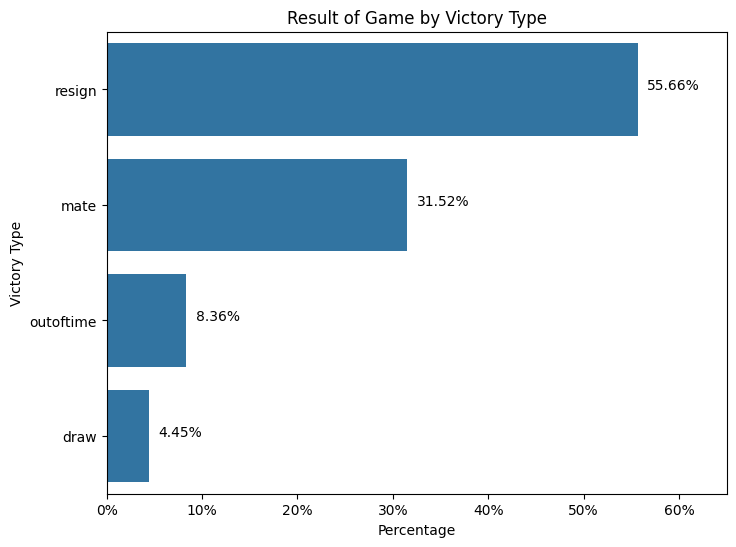

In [11]:
victory = df['victory_status'].value_counts(normalize=True).reset_index()
victory.rename(columns = {'proportion': 'percentage'}, inplace = True)
victory['percentage'] = victory['percentage'] * 100

fig, ax = plt.subplots(figsize = (8,6))
sns.barplot(victory, x = 'percentage', y = 'victory_status')

ax.set_xticklabels([f'{int(x)}%' for x in ax.get_xticks()])

for i, r in victory.iterrows():
    ax.text(r['percentage'] + 1, i, f'{r['percentage']:.2f}%')

plt.xlim(0,65)
plt.ylabel('Victory Type')
plt.xlabel('Percentage')
plt.title('Result of Game by Victory Type')

C:\Users\Daniel\AppData\Local\Temp\ipykernel_7460\1698481420.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(winner_counts, x = 'percentage', y = 'winner', palette=colors)
C:\Users\Daniel\AppData\Local\Temp\ipykernel_7460\1698481420.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([f'{int(y)}%' for y in ax.get_xticks()])


Text(0.5, 1.0, 'Result of Games by Color')

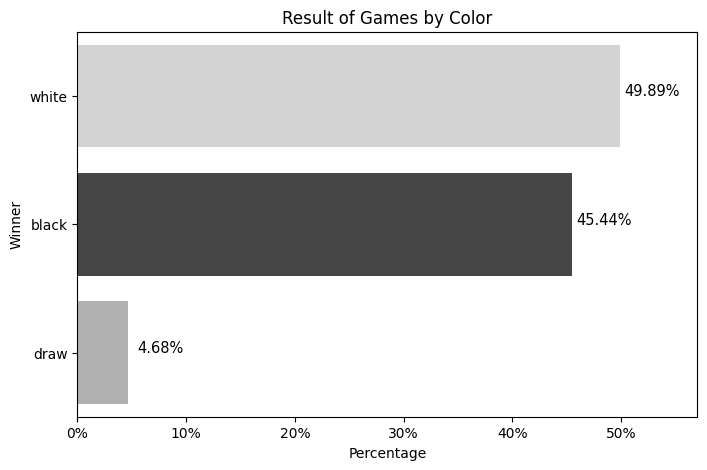

In [12]:
winner_counts = df['winner'].value_counts(normalize=True).reset_index()
winner_counts.rename(columns = {'proportion': 'percentage'}, inplace = True)
winner_counts['percentage'] = winner_counts['percentage'] * 100

fig, ax = plt.subplots(figsize=(8,5))
colors = ['#d3d3d3', '#454545', '#b0b0b0']
sns.barplot(winner_counts, x = 'percentage', y = 'winner', palette=colors)

for i, r in winner_counts.iterrows():
    ax.text(r['percentage'] + 3, i, f'{r['percentage']:.2f}%', ha = 'center', fontsize = 10.5)

ax.set_xticklabels([f'{int(y)}%' for y in ax.get_xticks()])
plt.xlim(0,57)
plt.xlabel('Percentage')
plt.ylabel('Winner')
plt.title('Result of Games by Color')

C:\Users\Daniel\AppData\Local\Temp\ipykernel_7460\1046134974.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([f'{x*100:.0f}%' for x in ax.get_xticks()])


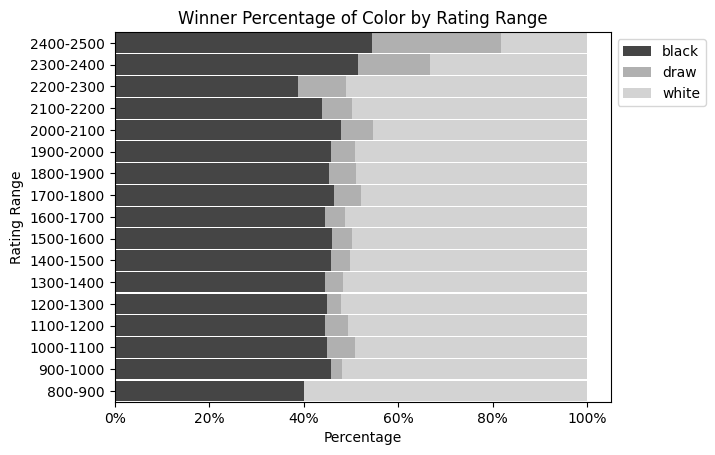

In [112]:
elo_range_winner = df.groupby(['elo_range'])['winner'].value_counts(normalize=True).reset_index(name = 'percentage')
elo_range_winner = elo_range_winner.pivot(index = 'elo_range', columns = 'winner', values = 'percentage').sort_index()
def sort_key(x):
    return int(x.split('-')[0])
elo_range_winner.sort_index(key = lambda x: x.map(sort_key), inplace = True)
colors = ['#454545','#b0b0b0', '#d3d3d3']
ax = elo_range_winner.plot(kind = 'barh', stacked = True, color=colors)
ax.set_xticklabels([f'{x*100:.0f}%' for x in ax.get_xticks()])
plt.legend(bbox_to_anchor = (1,1))
plt.xlabel('Percentage')
plt.ylabel('Rating Range')
plt.title('Winner Percentage of Color by Rating Range')
new_height = .95
for i, patch in enumerate(ax.patches):
    current_height = patch.get_height()
    current_y = patch.get_y()
    center = current_y + current_height / 2
    new_y = center - new_height / 2
  
    patch.set_height(new_height)
    patch.set_y(new_y)


In [14]:
df['elo_difference'].min(), df['elo_difference'].max()

(0, 1605)

C:\Users\Daniel\AppData\Local\Temp\ipykernel_7460\3602849705.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(f'{x*100:.0f}%' for x in ax.get_xticks())


Text(0.5, 1.0, 'Winner Percentage of Color by Elo Difference')

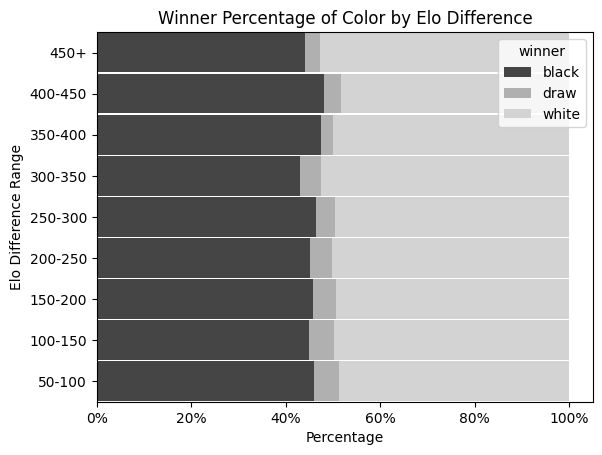

In [113]:
def elo_difference_ranges(x):
    if x < 0:
        return '0-50'
    elif x < 50:
        return '50-100'
    elif x < 100:
        return '100-150'
    elif x < 150:
        return '150-200'
    elif x < 200:
        return '200-250'
    elif x < 250:
        return '250-300'
    elif x < 300:
        return '300-350'
    elif x < 350:
        return '350-400'
    elif x < 400:
        return '400-450'
    else:
        return '450+'


df['elo_difference_range'] = df['elo_difference'].apply(elo_difference_ranges)

def sort_key(x):
    if '+' in x:
        return int(x.replace("+",""))
    else:
        return int(x.split('-')[0])

elo_diff_range = df.groupby(['elo_difference_range'])['winner'].value_counts(normalize = True).reset_index(name = 'percentage')
elo_diff_range = elo_diff_range.pivot(index = 'elo_difference_range', columns = 'winner', values = 'percentage')
elo_diff_range.sort_index(key = lambda x: x.map(sort_key), inplace = True)
colors = ['#454545','#b0b0b0', '#d3d3d3']
ax = elo_diff_range.plot(kind = 'barh', stacked = True, color = colors)
ax.set_xticklabels(f'{x*100:.0f}%' for x in ax.get_xticks())

new_height = .96
for i, patch in enumerate(ax.patches):
    current_height = patch.get_height()
    current_y = patch.get_y()
    center = current_y + current_height / 2
    new_y = center - new_height / 2
  
    patch.set_height(new_height)
    patch.set_y(new_y)

plt.xlabel('Percentage')
plt.ylabel('Elo Difference Range')
plt.title('Winner Percentage of Color by Elo Difference')

In [199]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from xgboost import XGBClassifier, plot_importance

In [158]:
le = LabelEncoder()
df[['opening_eco','increment_code']] = df[['opening_eco','increment_code']].apply(lambda x: le.fit_transform(x))
df_dropped = df.drop(columns = ['id', 'created_at', 'last_move_at', 'white_id', 'black_id', 'moves', 'elo_range', 'elo_difference_range', 'opening_name'])
df_dropped['rated'] = df_dropped['rated'].apply(lambda x: 1 if x == True else 0)
df_dropped['winner'] = df_dropped['winner'].apply(lambda x: 1 if x == 'white' else (0 if x == 'black' else 2))
df_dropped = pd.get_dummies(df_dropped, columns = ['victory_status'], dtype = int)
df_dropped.head()

,rated,turns,winner,increment_code,white_rating,black_rating,opening_eco,opening_ply,average_rating,elo_difference,victory_status_draw,victory_status_mate,victory_status_outoftime,victory_status_resign
0,0,13,1,110,1500,1191,248,5,1345.5,309,0,0,1,0
1,1,16,0,298,1322,1261,71,4,1291.5,61,0,0,0,1
2,1,61,1,298,1496,1500,171,3,1498.0,4,0,1,0,0
3,1,61,1,187,1439,1454,241,3,1446.5,15,0,1,0,0
4,1,95,1,247,1523,1469,192,5,1496.0,54,0,1,0,0


In [195]:
# scaler = StandardScaler()
# df_scaled = scaler.fit_transform(df_dropped)
# df_scaled = pd.DataFrame(df_scaled, columns = df_dropped.columns)


# cols_to_log = ['turns', 'increment_code', 'opening_eco', 'opening_ply', 'elo_difference']

# df_scaled[cols_to_log] = df_scaled[cols_to_log].apply(lambda x: np.log(x+1))
# df_scaled.hist(figsize=(14,10))
df_dropped.head()


,rated,turns,winner,increment_code,white_rating,black_rating,opening_eco,opening_ply,average_rating,elo_difference,victory_status_draw,victory_status_mate,victory_status_outoftime,victory_status_resign
0,0,13,1,110,1500,1191,248,5,1345.5,309,0,0,1,0
1,1,16,0,298,1322,1261,71,4,1291.5,61,0,0,0,1
2,1,61,1,298,1496,1500,171,3,1498.0,4,0,1,0,0
3,1,61,1,187,1439,1454,241,3,1446.5,15,0,1,0,0
4,1,95,1,247,1523,1469,192,5,1496.0,54,0,1,0,0


<Axes: >

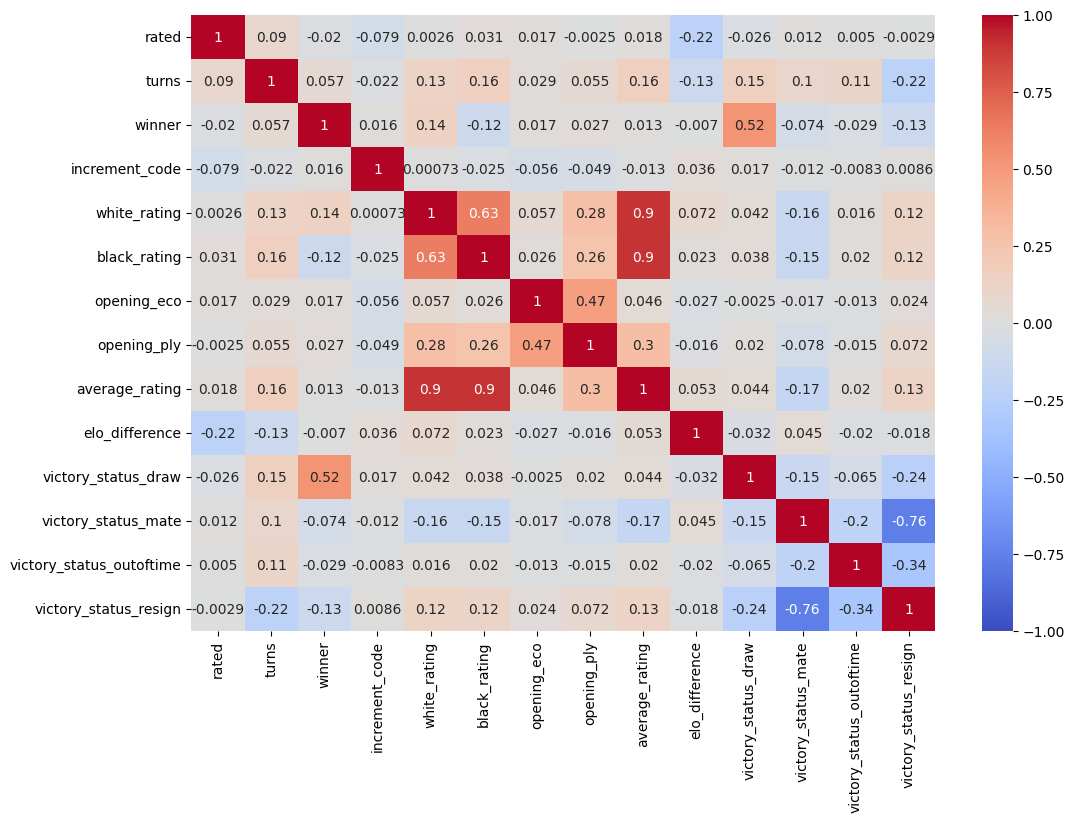

In [159]:
plt.figure(figsize = (12,8))
sns.heatmap(df_dropped.corr(), annot = True, vmin = -1, vmax= 1, cmap = 'coolwarm')

In [197]:
X = df_dropped.drop(columns = 'winner')
y = df_dropped['winner']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state=42)

xgb = XGBClassifier()
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [205]:
y_pred = xgb.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.88      0.87      1763
           1       0.89      0.88      0.89      1984
           2       0.99      0.94      0.97       179

    accuracy                           0.88      3926
   macro avg       0.91      0.90      0.91      3926
weighted avg       0.88      0.88      0.88      3926



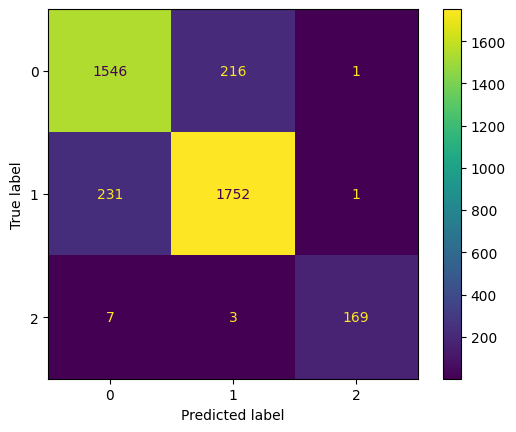

In [207]:
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

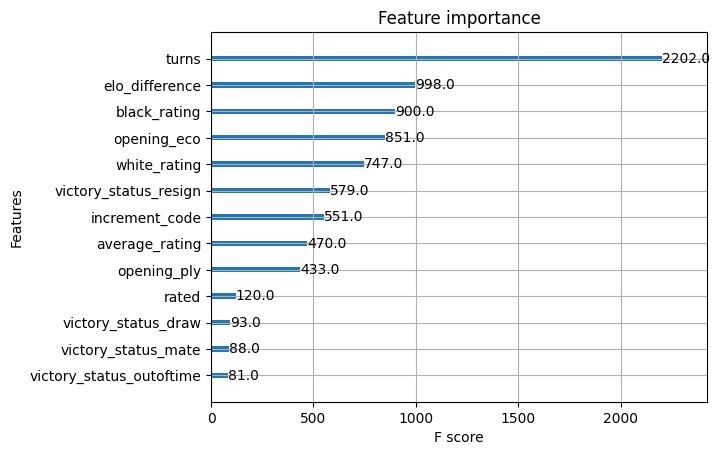

In [208]:
plot_importance(xgb)